### **Alishba Bacha**

####**Empowering Glioma Prognosis With Transparent Machine Learning and Interpretative Insights Using Explainable AI**

####**Preprocessing**

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Load the dataset (replace 'your_file_path.csv' with the actual file path)
data = pd.read_csv('/content/TCGA_GBM_LGG_Mutations_all.csv')

data.head()

,Grade,Project,Case_ID,Gender,Age_at_diagnosis,Primary_Diagnosis,Race,IDH1,TP53,ATRX,...,FUBP1,RB1,NOTCH1,BCOR,CSMD3,SMARCA4,GRIN2A,IDH2,FAT4,PDGFRA
0,LGG,TCGA-LGG,TCGA-DU-8164,Male,51 years 108 days,"Oligodendroglioma, NOS",white,MUTATED,NOT_MUTATED,NOT_MUTATED,...,MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED
1,LGG,TCGA-LGG,TCGA-QH-A6CY,Male,38 years 261 days,Mixed glioma,white,MUTATED,NOT_MUTATED,NOT_MUTATED,...,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED
2,LGG,TCGA-LGG,TCGA-HW-A5KM,Male,35 years 62 days,"Astrocytoma, NOS",white,MUTATED,MUTATED,MUTATED,...,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED
3,LGG,TCGA-LGG,TCGA-E1-A7YE,Female,32 years 283 days,"Astrocytoma, anaplastic",white,MUTATED,MUTATED,MUTATED,...,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,MUTATED,NOT_MUTATED
4,LGG,TCGA-LGG,TCGA-S9-A6WG,Male,31 years 187 days,"Astrocytoma, anaplastic",white,MUTATED,MUTATED,MUTATED,...,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED


In [ ]:
# Drop unnecessary columns
data = data.drop(columns=['Project', 'Case_ID', 'Primary_Diagnosis'])

In [ ]:
# Remove rows with missing values
data = data.replace(['--', 'not reported'], pd.NA)
data = data.dropna()

In [ ]:
# Standardize the 'Age_at_diagnosis' column
# Extract years from the string and convert to float
data['Age_at_diagnosis'] = data['Age_at_diagnosis'].str.extract('(\d+) years').astype(float)

scaler = StandardScaler()
data['Age_at_diagnosis'] = scaler.fit_transform(data[['Age_at_diagnosis']])

In [ ]:
# Label encode categorical features: 'Gender', 'Race'
label_encoders = {}
for col in ['Gender', 'Race']:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

In [ ]:
data.head()

,Grade,Gender,Age_at_diagnosis,Race,IDH1,TP53,ATRX,PTEN,EGFR,CIC,...,FUBP1,RB1,NOTCH1,BCOR,CSMD3,SMARCA4,GRIN2A,IDH2,FAT4,PDGFRA
0,LGG,1,0.035447,3,MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,...,MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED
1,LGG,1,-0.792423,3,MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,MUTATED,...,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED
2,LGG,1,-0.983470,3,MUTATED,MUTATED,MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,...,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED
3,LGG,0,-1.174517,3,MUTATED,MUTATED,MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,...,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,MUTATED,NOT_MUTATED
4,LGG,1,-1.238199,3,MUTATED,MUTATED,MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,...,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED,NOT_MUTATED


In [ ]:
# Encode each gene mutation status: 0 = NOT_MUTATED, 1 = MUTATED
mutation_genes = [
    'IDH1', 'TP53', 'ATRX', 'PTEN', 'EGFR', 'CIC', 'MUC16', 'PIK3CA',
    'NF1', 'PIK3R1', 'FUBP1', 'RB1', 'NOTCH1', 'BCOR', 'CSMD3', 'SMARCA4',
    'GRIN2A', 'IDH2', 'FAT4', 'PDGFRA'
]
for gene in mutation_genes:
    data[gene] = data[gene].map({'NOT_MUTATED': 0, 'MUTATED': 1})

In [ ]:
# Encode 'Grade': 1 = GBM, 0 = LGG
data['Grade'] = data['Grade'].map({'GBM': 1, 'LGG': 0})

In [ ]:
data.head()

,Grade,Gender,Age_at_diagnosis,Race,IDH1,TP53,ATRX,PTEN,EGFR,CIC,...,FUBP1,RB1,NOTCH1,BCOR,CSMD3,SMARCA4,GRIN2A,IDH2,FAT4,PDGFRA
0,0,1,0.035447,3,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,0,1,-0.792423,3,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,1,-0.983470,3,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,-1.174517,3,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,1,-1.238199,3,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Define the target variable and features
X = data.drop(columns=['Grade'])
y = data['Grade']

###**1) Pearson Correlation**

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the Pearson correlation matrix
correlation_matrix = data.corr()

# Display the correlation matrix
print(correlation_matrix)


                     Grade    Gender  Age_at_diagnosis      Race      IDH1  \
Grade             1.000000  0.060033          0.528786 -0.080084 -0.708141   
Gender            0.060033  1.000000          0.015945 -0.004267 -0.048282   
Age_at_diagnosis  0.528786  0.015945          1.000000 -0.017907 -0.569070   
Race             -0.080084 -0.004267         -0.017907  1.000000  0.079718   
IDH1             -0.708141 -0.048282         -0.569070  0.079718  1.000000   
TP53             -0.161786 -0.002022         -0.316176  0.087353  0.340995   
ATRX             -0.314625 -0.056376         -0.418821  0.031540  0.454920   
PTEN              0.367174  0.032233          0.259523 -0.016188 -0.394862   
EGFR              0.241527  0.034497          0.227267 -0.028343 -0.357217   
CIC              -0.303459 -0.061063         -0.122365  0.037230  0.320696   
MUC16             0.119447 -0.015054          0.089930 -0.014952 -0.097956   
PIK3CA            0.028905  0.004629          0.050261 -0.024849

#####**Correlation Heatmap**

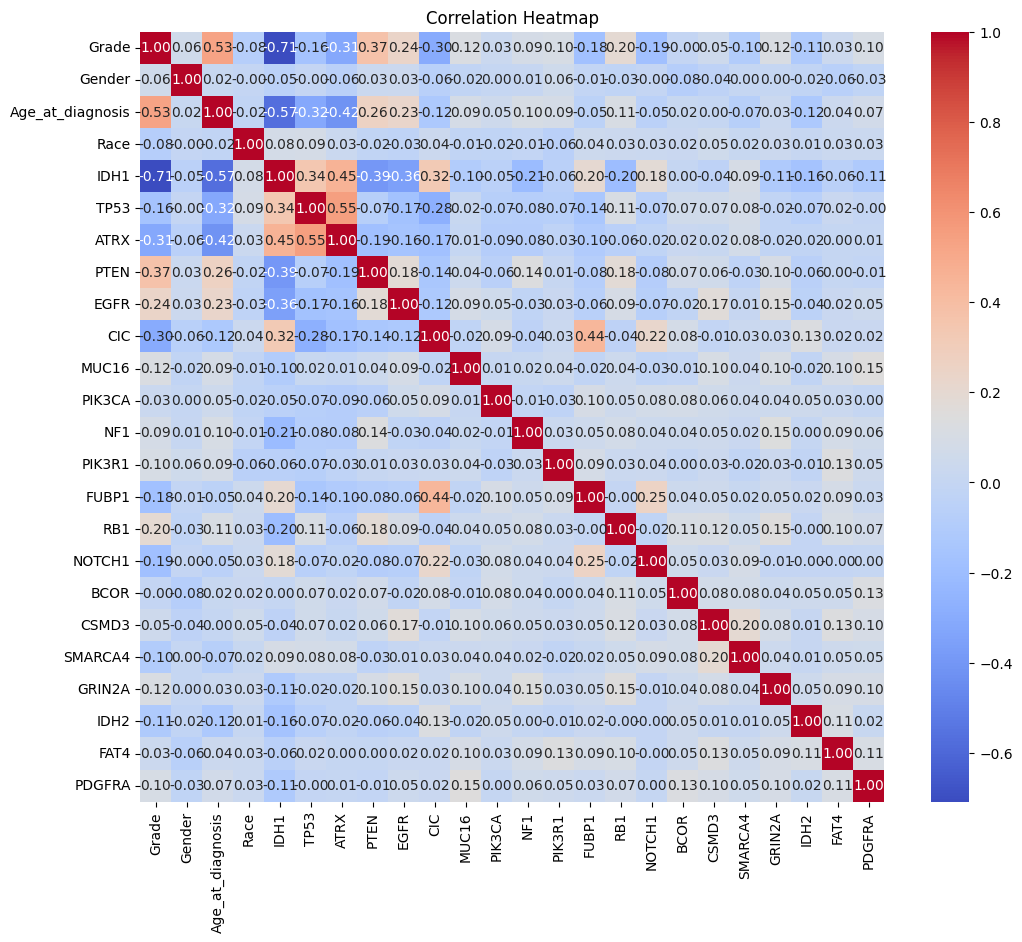

In [ ]:
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', cbar=True)
plt.title("Correlation Heatmap")
plt.show()

#####**Feature selection**

In [ ]:
from sklearn.feature_selection import mutual_info_classif

# Calculate Mutual Information between each feature and the target variable
mi_scores = mutual_info_classif(X, y)

# Convert MI scores to a Pandas Series for better visualization
mi_scores = pd.Series(mi_scores, index=X.columns).sort_values(ascending=False)

# Display MI scores
print("Mutual Information Scores:")
print(mi_scores)

Mutual Information Scores:
IDH1                0.279325
Age_at_diagnosis    0.173533
PTEN                0.093254
CIC                 0.074559
EGFR                0.052171
ATRX                0.047464
TP53                0.040623
FAT4                0.037873
GRIN2A              0.024478
Gender              0.023837
PIK3R1              0.017102
CSMD3               0.016456
RB1                 0.008304
FUBP1               0.005588
IDH2                0.000000
SMARCA4             0.000000
NF1                 0.000000
BCOR                0.000000
NOTCH1              0.000000
PIK3CA              0.000000
MUC16               0.000000
Race                0.000000
PDGFRA              0.000000
dtype: float64


#####**Graph for mutual information score for each feature**

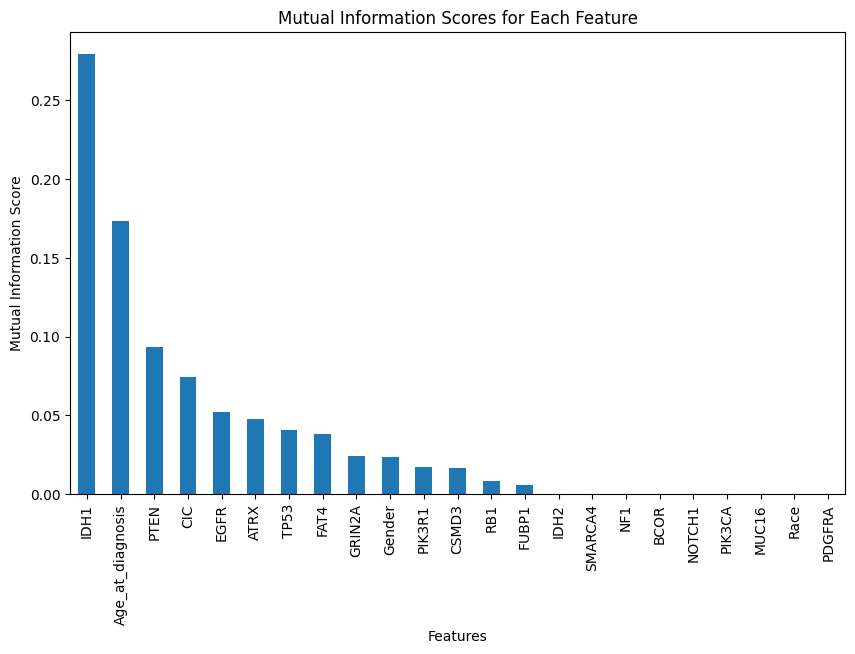

In [ ]:
plt.figure(figsize=(10, 6))
mi_scores.plot(kind='bar')
plt.title("Mutual Information Scores for Each Feature")
plt.xlabel("Features")
plt.ylabel("Mutual Information Score")
plt.show()

####**Standard scaling the data And Principal component Analysis**

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardize the data (important for PCA)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA(n_components=None)
X_pca = pca.fit_transform(X_scaled)

# Explained variance
explained_variance = pca.explained_variance_ratio_
print("Explained variance ratio:", explained_variance)

Explained variance ratio: [0.12269796 0.08727509 0.07702616 0.05079427 0.05028028 0.04949776
 0.04624257 0.04480238 0.0431342  0.04236579 0.0420867  0.0397555
 0.03726074 0.03542412 0.03493961 0.03415874 0.0327575  0.02933992
 0.0281059  0.02557448 0.01982948 0.01721476 0.00943611]


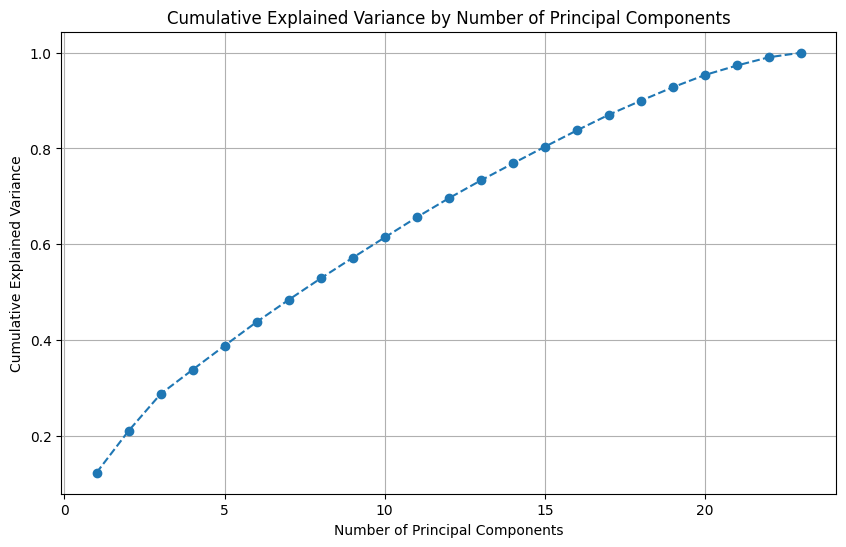

In [ ]:
# Ploting variance to determine number of components
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance.cumsum(), marker='o', linestyle='--')
plt.title('Cumulative Explained Variance by Number of Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid()
plt.show()

In [ ]:
# Display the amount of variance explained by each component
print("Explained variance by each component:")
for i, var in enumerate(explained_variance, start=1):
    print(f"Principal Component {i}: {var:.2f}")

Explained variance by each component:
Principal Component 1: 0.12
Principal Component 2: 0.09
Principal Component 3: 0.08
Principal Component 4: 0.05
Principal Component 5: 0.05
Principal Component 6: 0.05
Principal Component 7: 0.05
Principal Component 8: 0.04
Principal Component 9: 0.04
Principal Component 10: 0.04
Principal Component 11: 0.04
Principal Component 12: 0.04
Principal Component 13: 0.04
Principal Component 14: 0.04
Principal Component 15: 0.03
Principal Component 16: 0.03
Principal Component 17: 0.03
Principal Component 18: 0.03
Principal Component 19: 0.03
Principal Component 20: 0.03
Principal Component 21: 0.02
Principal Component 22: 0.02
Principal Component 23: 0.01


In [ ]:
# Create a DataFrame with the principal components for further analysis
pca_df = pd.DataFrame(X_pca, columns=[f"PC{i+1}" for i in range(X_pca.shape[1])])
print(pca_df.head())

        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0  0.531558  2.938014 -0.378961 -1.097979 -0.515062 -0.426525  0.700355   
1  1.078300  1.730874 -1.008868 -0.062429 -0.037349 -0.035073  0.332894   
2  2.322462 -1.302614  0.047689  0.043642 -0.205041  0.311685  0.594928   
3  1.502336 -0.445511  3.354913  5.228114 -1.572694  0.091969 -0.679647   
4  2.432091 -1.306271  0.070504  0.055799 -0.177484  0.297145  0.654568   

        PC8       PC9      PC10  ...      PC14      PC15      PC16      PC17  \
0 -0.369320 -0.525534 -1.802022  ... -0.688731 -1.432330  0.001613 -0.214980   
1  0.712137  0.046037 -0.192501  ... -0.966562 -0.636416 -0.272954 -0.051639   
2  0.102088 -0.034822 -0.487932  ...  0.045991 -0.306346  0.248405  0.162100   
3 -0.772394 -2.975875  0.605596  ...  0.912649 -0.134102 -1.577939  1.767466   
4  0.105688 -0.022772 -0.493246  ...  0.051587 -0.334154  0.272477  0.144510   

       PC18      PC19      PC20      PC21      PC22      PC23  
0  1

In [ ]:
selected_features = data[['IDH1', 'Age_at_diagnosis', 'PIK3CA', 'ATRX', 'PTEN', 'CIC', 'EGFR', 'TP53']]

###**Machine learning models**

In [ ]:
!pip install CatBoost
!pip install lime
!pip install feyn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 8.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=af1df37343d76f178e39ba86f0e82708ffbbb5bbe304d657d7bf35d0ad61cb31
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 326.2/326.2 kB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.0/111.0 kB 11.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 856.7/856.7 kB 35.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.1/67.1 kB 7.0 MB/s eta 0:00:00


In [ ]:

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, StackingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    roc_curve, hamming_loss, log_loss, jaccard_score, matthews_corrcoef, classification_report
)
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import AdaBoostClassifier
import shap
import lime.lime_tabular
from sklearn.inspection import permutation_importance
from feyn import QLattice

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [ ]:
# Split dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# Model Training with Grid Search
rf = RandomForestClassifier()
knn = KNeighborsClassifier()
log_reg = LogisticRegression(max_iter=2000)
dt = DecisionTreeClassifier()

#####**Grid search**

In [ ]:
param_grid_rf = {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20]}
param_grid_knn = {'n_neighbors': [3, 5, 7]}
param_grid_log_reg = {'C': [0.01, 0.1, 1, 10]}
param_grid_dt = {'max_depth': [None, 5, 10, 20]}

In [ ]:
# Conduct Grid Search for each model
grid_search_rf = GridSearchCV(rf, param_grid_rf, cv=5)
grid_search_rf.fit(X_train, y_train)
grid_search_knn = GridSearchCV(knn, param_grid_knn, cv=5)
grid_search_knn.fit(X_train, y_train)
grid_search_log_reg = GridSearchCV(log_reg, param_grid_log_reg, cv=5)
grid_search_log_reg.fit(X_train, y_train)
grid_search_dt = GridSearchCV(dt, param_grid_dt, cv=5)
grid_search_dt.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [None, 5, 10, 20]})

In [ ]:
# Best estimators
rf_best = grid_search_rf.best_estimator_
knn_best = grid_search_knn.best_estimator_
log_reg_best = grid_search_log_reg.best_estimator_
dt_best = grid_search_dt.best_estimator_

In [ ]:
# Stack Ensemble Models
stacking_estimators = [
    ('rf', rf_best),
    ('knn', knn_best),
    ('log_reg', log_reg_best),
    ('dt', dt_best)
]

In [ ]:
xgb = XGBClassifier()
lgbm = LGBMClassifier()
catboost = CatBoostClassifier(verbose=0)
adaboost = AdaBoostClassifier()


In [ ]:
# Second-level stack
stacking_estimators_2 = [
    ('xgb', xgb),
    ('lgbm', lgbm),
    ('catboost', catboost),
    ('adaboost', adaboost)
]

In [ ]:
# Final stacking classifier
final_stack = StackingClassifier(
    estimators=stacking_estimators,
    final_estimator=StackingClassifier(estimators=stacking_estimators_2)
)

final_stack.fit(X_train, y_train)
y_pred = final_stack.predict(X_test)


[LightGBM] [Info] Number of positive: 250, number of negative: 337
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000881 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 422
[LightGBM] [Info] Number of data points in the train set: 587, number of used features: 4
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.425894 -> initscore=-0.298622
[LightGBM] [Info] Start training from score -0.298622
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[LightGBM] [Info] Number of positive: 200, number of negative: 269
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000058 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 340
[LightGBM] [Info] Number of data points in the train set: 469, number of used features: 4
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.426439 -> initscore=-0.296394
[LightGBM] [Info] Start training from score -0.296394
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.1

####**Model Evaluation**

In [ ]:
# Model Performance Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8888888888888888
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.87      0.90       150
           1       0.82      0.92      0.87       102

    accuracy                           0.89       252
   macro avg       0.88      0.89      0.89       252
weighted avg       0.89      0.89      0.89       252



###**Explainable AI Techniques**

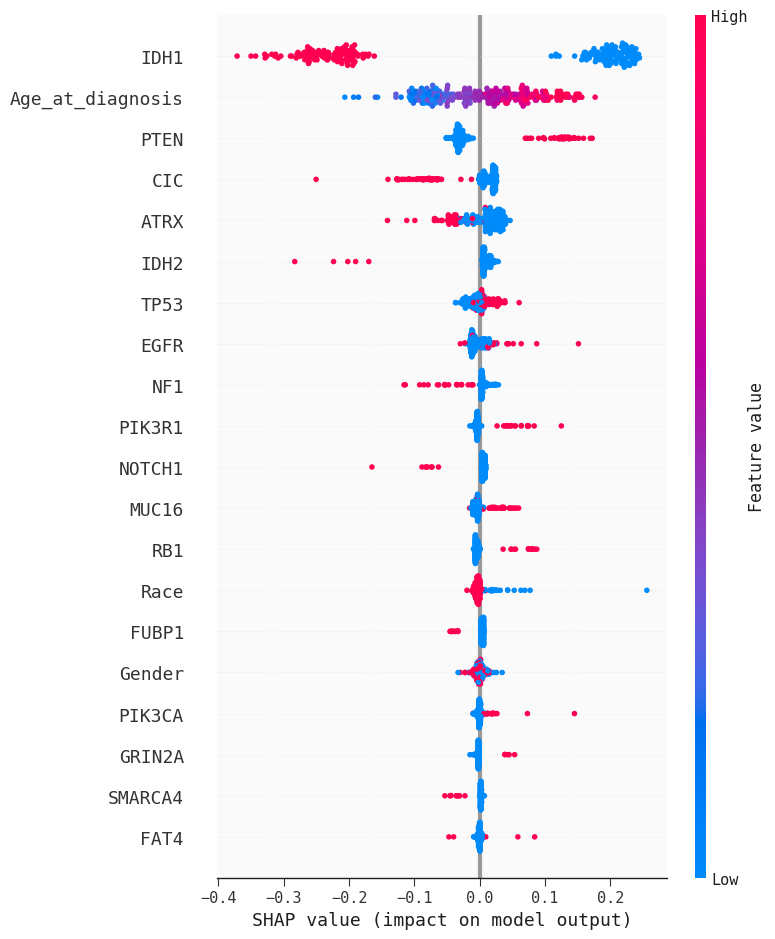

In [ ]:
# SHAP (for Random Forest as an example)
explainer = shap.TreeExplainer(rf_best)
shap_values = explainer.shap_values(X_test)

# Check if shap_values is 3D (likely for multi-class or binary with two outputs)
if len(shap_values.shape) == 3:
    # If it's 3D, select SHAP values for a specific class (e.g., class 1)
    shap.summary_plot(shap_values[:, :, 1], X_test, feature_names=X.columns)
else:
    # If it's 2D, use it directly
    shap.summary_plot(shap_values, X_test, feature_names=X.columns)

In [ ]:
# LIME
lime_explainer = lime.lime_tabular.LimeTabularExplainer(
    X_train.values,
    feature_names=X.columns,
    class_names=['Class 0', 'Class 1'],
    mode='classification'
)
lime_exp = lime_explainer.explain_instance(X_test.values[0], rf_best.predict_proba)
lime_exp.show_in_notebook()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [ ]:
# Permutation Importance instead of ELI5
perm_importance = permutation_importance(rf_best, X_test, y_test, n_repeats=10, random_state=42)
for i in perm_importance.importances_mean.argsort()[::-1]:
    print(f"{X.columns[i]}: {perm_importance.importances_mean[i]:.3f} +/- {perm_importance.importances_std[i]:.3f}")

IDH1: 0.218 +/- 0.021
Age_at_diagnosis: 0.019 +/- 0.007
CIC: 0.017 +/- 0.011
IDH2: 0.008 +/- 0.005
NOTCH1: 0.008 +/- 0.004
NF1: 0.008 +/- 0.004
ATRX: 0.004 +/- 0.005
EGFR: 0.002 +/- 0.002
MUC16: 0.002 +/- 0.003
Race: 0.001 +/- 0.002
PTEN: 0.001 +/- 0.003
TP53: 0.000 +/- 0.003
Gender: 0.000 +/- 0.003
RB1: 0.000 +/- 0.001
PIK3CA: 0.000 +/- 0.000
BCOR: 0.000 +/- 0.000
GRIN2A: 0.000 +/- 0.000
PDGFRA: 0.000 +/- 0.000
FAT4: -0.000 +/- 0.001
PIK3R1: -0.000 +/- 0.001
FUBP1: -0.000 +/- 0.001
CSMD3: -0.000 +/- 0.001
SMARCA4: -0.000 +/- 0.001


In [ ]:
qlattice = QLattice()
data_combined = X.copy()
data_combined['Grade'] = y

# Split data for training and validation to evaluate models
X_train, X_val, y_train, y_val = train_test_split(data_combined, data_combined['Grade'], test_size=0.2, random_state=42)

# Train QLattice
models = qlattice.auto_run(X_train, output_name='Grade', n_epochs=100)

In [ ]:
# Evaluate each model on the validation set and select the best one
best_model = None
best_accuracy = 0

for model in models:
    # Make predictions on the validation set
    y_pred_prob = model.predict(X_val.drop(columns=['Grade'])).ravel()
    y_pred = [1 if p >= 0.5 else 0 for p in y_pred_prob]
    accuracy = accuracy_score(y_val, y_pred)

    # Update the best model if this one is better
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = model

# Display the best model's accuracy
print("Best Model Accuracy:", best_accuracy)


Best Model Accuracy: 0.8690476190476191


<?xml version="1.0" encoding="utf-8" ?>
<svg baseProfile="full" height="264.0" preserveAspectRatio="none" version="1.1" viewBox="0 0 1011 264.0" width="1011" xmlns="http://www.w3.org/2000/svg" xmlns:ev="http://www.w3.org/2001/xml-events" xmlns:xlink="http://www.w3.org/1999/xlink"><defs /><svg class="graph" height="155.0" width="831" x="0" y="0"><defs /><rect class="node" fill="#00F082" height="35" stroke="#1E1E1E" stroke-width="1" width="90" x="721" y="50.0"><title>Grade
logistic:
w=2.6793
bias=-0.2897</title></rect><text fill="#1E1E1E" font-family="monospace" font-size="12" style="pointer-events:none" text-anchor="middle" x="766.0" y="71.5">Grade</text><text fill="#1E1E1E" font-family="monospace" font-size="10" style="pointer-events:none" text-anchor="end" x="809" y="59.0">0</text><text fill="#1E1E1E" font-family="monospace" font-size="10" style="pointer-events:none" text-anchor="start" x="723" y="59.0">logistic</text><line stroke="#1E1E1E" x1="691" x2="721" y1="67.5" y2="67.5" /><rect class="node" fill="#FAFAFA" height="35" stroke="#FF1EC8" stroke-width="1" width="90" x="601" y="50.0"><title>add</title></rect><text fill="#1E1E1E" font-family="monospace" font-size="12" style="pointer-events:none" text-anchor="middle" x="646.0" y="71.5">add</text><text fill="#1E1E1E" font-family="monospace" font-size="10" style="pointer-events:none" text-anchor="end" x="689" y="59.0">1</text><line stroke="#1E1E1E" x1="571" x2="601" y1="37.5" y2="58.5" /><line stroke="#1E1E1E" x1="571" x2="601" y1="97.5" y2="76.5" /><rect class="node" fill="#FAFAFA" height="35" stroke="#FF1EC8" stroke-width="1" width="90" x="481" y="20.0"><title>add</title></rect><text fill="#1E1E1E" font-family="monospace" font-size="12" style="pointer-events:none" text-anchor="middle" x="526.0" y="41.5">add</text><text fill="#1E1E1E" font-family="monospace" font-size="10" style="pointer-events:none" text-anchor="end" x="569" y="29.0">2</text><line stroke="#1E1E1E" x1="451" x2="481" y1="37.5" y2="28.5" /><line stroke="#1E1E1E" x1="451" x2="481" y1="97.5" y2="46.5" /><rect class="node" fill="#FAFAFA" height="35" stroke="#FF1EC8" stroke-width="1" width="90" x="361" y="20.0"><title>tanh</title></rect><text fill="#1E1E1E" font-family="monospace" font-size="12" style="pointer-events:none" text-anchor="middle" x="406.0" y="41.5">tanh</text><text fill="#1E1E1E" font-family="monospace" font-size="10" style="pointer-events:none" text-anchor="end" x="449" y="29.0">3</text><line stroke="#1E1E1E" x1="331" x2="361" y1="67.5" y2="37.5" /><rect class="node" fill="#FAFAFA" height="35" stroke="#FF1EC8" stroke-width="1" width="90" x="241" y="50.0"><title>add</title></rect><text fill="#1E1E1E" font-family="monospace" font-size="12" style="pointer-events:none" text-anchor="middle" x="286.0" y="71.5">add</text><text fill="#1E1E1E" font-family="monospace" font-size="10" style="pointer-events:none" text-anchor="end" x="329" y="59.0">4</text><line stroke="#1E1E1E" x1="211" x2="241" y1="37.5" y2="58.5" /><line stroke="#1E1E1E" x1="211" x2="241" y1="97.5" y2="76.5" /><rect class="node" fill="#FAFAFA" height="35" stroke="#FF1EC8" stroke-width="1" width="90" x="121" y="20.0"><title>add</title></rect><text fill="#1E1E1E" font-family="monospace" font-size="12" style="pointer-events:none" text-anchor="middle" x="166.0" y="41.5">add</text><text fill="#1E1E1E" font-family="monospace" font-size="10" style="pointer-events:none" text-anchor="end" x="209" y="29.0">5</text><line stroke="#1E1E1E" x1="91" x2="121" y1="37.5" y2="28.5" /><line stroke="#1E1E1E" x1="91" x2="121" y1="97.5" y2="46.5" /><rect class="node" fill="#00F082" height="35" stroke="#1E1E1E" stroke-width="1" width="90" x="1" y="20.0"><title>IDH2
linear:
scale=2.000000
scale offset=0.029806
w=-1.509133
bias=0.0347</title></rect><text fill="#1E1E1E" font-family="monospace" font-size="12" style="pointer-events:none" text-anchor="middle" x="46.0" y="41.5">IDH2</text><text fill="#1E1E1E" font-family="monospace" font-size="10" style="pointer-events:none" 
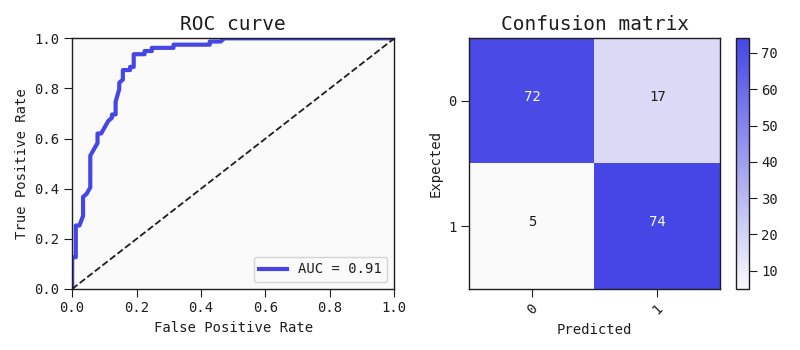

In [ ]:
best_model.plot(X_val)

###**Results**

#####**A) Performance metrices**

In [ ]:
classifiers = {
    "Random Forest": RandomForestClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "SVM (Linear Kernel)": SVC(kernel="linear", probability=True),
    "SVM (Sigmoid Kernel)": SVC(kernel="sigmoid", probability=True),
    "AdaBoost": AdaBoostClassifier(algorithm="SAMME"),
    "CatBoost": CatBoostClassifier(verbose=0),
    "XGBoost": XGBClassifier(),
    "LightGBM": LGBMClassifier(verbose=-1),
    "Ridge Classifier": RidgeClassifier()
}

# Stack 1: Random Forest, Logistic Regression, KNN, Decision Tree
stack1 = StackingClassifier(
    estimators=[
        ('rf', RandomForestClassifier()),
        ('lr', LogisticRegression(max_iter=1000)),
        ('knn', KNeighborsClassifier()),
        ('dt', DecisionTreeClassifier())
    ],
    final_estimator=LogisticRegression()
)

# Stack 2: AdaBoost, CatBoost, XGBoost, LightGBM
stack2 = StackingClassifier(
    estimators=[
        ('ada', AdaBoostClassifier()),
        ('cat', CatBoostClassifier(verbose=0)),
        ('xgb', XGBClassifier()),
        ('lgbm', LGBMClassifier())
    ],
    final_estimator=LogisticRegression()
)

# Final Stack: Stack 1 and Stack 2
final_stack = StackingClassifier(
    estimators=[
        ('stack1', stack1),
        ('stack2', stack2)
    ],
    final_estimator=LogisticRegression()
)

# Adding stacks to classifiers list
classifiers.update({
    "Stack 1": stack1,
    "Stack 2": stack2,
    "Final Stack": final_stack
})

In [ ]:
# Function to evaluate a classifier
def evaluate_classifier(name, classifier, X_train, X_test, y_train, y_test):
    classifier.fit(X_train.drop(columns = ['Grade']), y_train)
    y_pred = classifier.predict(X_test)
    y_pred_proba = classifier.predict_proba(X_test)[:, 1] if hasattr(classifier, "predict_proba") else None

    # Calculating metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, pos_label=0)
    recall = recall_score(y_test, y_pred, pos_label=0)
    f1 = f1_score(y_test, y_pred, pos_label=0)
    auc_score = roc_auc_score(y_test, y_pred_proba) if y_pred_proba is not None else "N/A"
    hamming = hamming_loss(y_test, y_pred)
    logloss = log_loss(y_test, y_pred_proba) if y_pred_proba is not None else "N/A"
    jaccard = jaccard_score(y_test, y_pred, pos_label=0)
    mcc = matthews_corrcoef(y_test, y_pred)

    # Print metrics
    print(f"\nResults for {name}:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"AUC Score: {auc_score if auc_score != 'N/A' else 'No probability scores available for AUC'}")
    print(f"Hamming Loss: {hamming:.4f}")
    print(f"Log Loss: {logloss if logloss != 'N/A' else 'No probability scores available for Log Loss'}")
    print(f"Jaccard Score: {jaccard:.4f}")
    print(f"Matthews Correlation Coefficient (MCC): {mcc:.4f}")

    # ROC Curve
    if y_pred_proba is not None:
        fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba, pos_label=0)
        plt.plot(fpr, tpr, label=f"{name} (AUC = {auc_score:.2f})")

####**Evaluation**


Results for Random Forest:
Accuracy: 0.8810
Precision: 0.9110
Recall: 0.8867
F1 Score: 0.8986
AUC Score: 0.941045751633987
Hamming Loss: 0.1190
Log Loss: 0.42610881604421
Jaccard Score: 0.8160
Matthews Correlation Coefficient (MCC): 0.7549

Results for K-Nearest Neighbors:
Accuracy: 0.8849
Precision: 0.9353
Recall: 0.8667
F1 Score: 0.8997
AUC Score: 0.9218954248366014
Hamming Loss: 0.1151
Log Loss: 1.3578552551545962
Jaccard Score: 0.8176
Matthews Correlation Coefficient (MCC): 0.7683

Results for Logistic Regression:
Accuracy: 0.8849
Precision: 0.9481
Recall: 0.8533
F1 Score: 0.8982
AUC Score: 0.9255555555555556
Hamming Loss: 0.1151
Log Loss: 0.32261851322542323
Jaccard Score: 0.8153
Matthews Correlation Coefficient (MCC): 0.7723

Results for Decision Tree:
Accuracy: 0.8333
Precision: 0.8418
Recall: 0.8867
F1 Score: 0.8636
AUC Score: 0.8270261437908497
Hamming Loss: 0.1667
Log Loss: 5.734967743918595
Jaccard Score: 0.7600
Matthews Correlation Coefficient (MCC): 0.6512

Results for SV

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.1


Results for Stack 2:
Accuracy: 0.8611
Precision: 0.9021
Recall: 0.8600
F1 Score: 0.8805
AUC Score: 0.9409150326797386
Hamming Loss: 0.1389
Log Loss: 0.31008322944200867
Jaccard Score: 0.7866
Matthews Correlation Coefficient (MCC): 0.7161


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.1


Results for Final Stack:
Accuracy: 0.8849
Precision: 0.9291
Recall: 0.8733
F1 Score: 0.9003
AUC Score: 0.9391503267973856
Hamming Loss: 0.1151
Log Loss: 0.3127754228783467
Jaccard Score: 0.8187
Matthews Correlation Coefficient (MCC): 0.7666


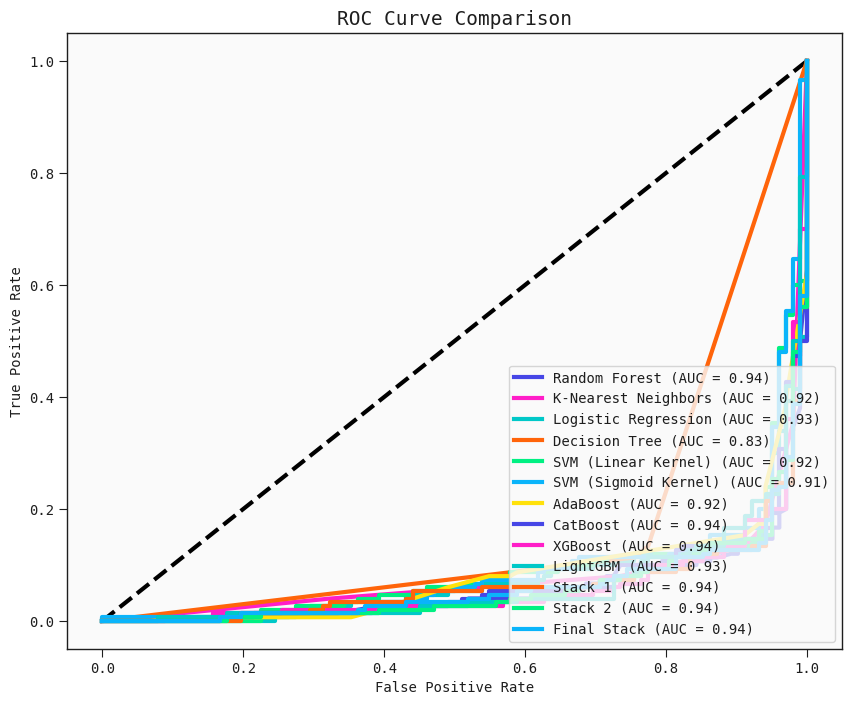

In [ ]:
# Evaluate each classifier and plot ROC curves
plt.figure(figsize=(10, 8))
plt.plot([0, 1], [0, 1], 'k--')
for name, clf in classifiers.items():
    evaluate_classifier(name, clf, X_train, X_test, y_train, y_test)

# Configure plot
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend(loc="lower right")
plt.show()

####**ANN model**

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.drop(columns=['Grade']))
X_test_scaled = scaler.transform(X_test)
# Initialize the ANN model
ann_model = Sequential()

# Add input layer and hidden layers
ann_model.add(Dense(units=64, activation='relu', input_dim=X_train_scaled.shape[1]))
ann_model.add(Dense(units=32, activation='relu'))

# Add output layer
ann_model.add(Dense(units=1, activation='sigmoid'))

# Compile the model
ann_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
ann_model.fit(X_train_scaled, y_train, epochs=30, batch_size=32)

# Make predictions
y_pred = (ann_model.predict(X_test_scaled) > 0.5)

# Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)

print(f'ANN Accuracy: {accuracy}')
print(f'ANN AUC: {auc}')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6244 - loss: 0.6838
Epoch 2/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7648 - loss: 0.5372 
Epoch 3/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8552 - loss: 0.4215 
Epoch 4/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8836 - loss: 0.3529 
Epoch 5/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9028 - loss: 0.2755 
Epoch 6/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8973 - loss: 0.2633
Epoch 7/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8956 - loss: 0.2677 
Epoch 8/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8801 - loss: 0.2919 
Epoch 9/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8845 - loss: 0.2882
Epoch 10/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9051 - loss: 0.2518 
Epoch 11/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8846 - loss: 0.2745
Epoch 12/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.89

In [ ]:
ann_model.save('/content/savedmodel.h5')

In [ ]:
!pip install tpot

In [ ]:
from tpot import TPOTClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Standardize the features (scaling)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

tpot = TPOTClassifier( generations=5, population_size=20, random_state=42, verbosity=2)
# Fit the TPOT model on the training data
tpot.fit(X_train_scaled, y_train)

# Evaluate the model on the test data
y_pred = tpot.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
auc_score = roc_auc_score(y_test, y_pred)

Optimization Progress:   0%|          | 0/120 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.8747927031509122

Generation 2 - Current best internal CV score: 0.8747927031509122

Generation 3 - Current best internal CV score: 0.8747927031509122

Generation 4 - Current best internal CV score: 0.8777667219458264

Generation 5 - Current best internal CV score: 0.8792482034273078

Best pipeline: BernoulliNB(SGDClassifier(input_matrix, alpha=0.01, eta0=0.01, fit_intercept=False, l1_ratio=0.75, learning_rate=invscaling, loss=squared_hinge, penalty=elasticnet, power_t=0.1), alpha=1.0, fit_prior=False)


TPOT Accuracy: 0.8690
TPOT AUC Score: 0.8728


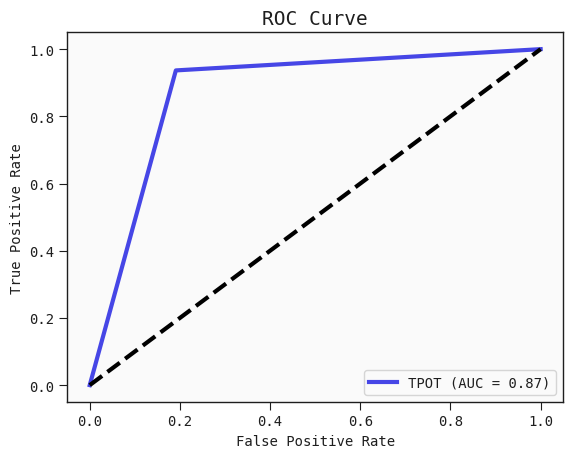

In [ ]:
print(f'TPOT Accuracy: {accuracy:.4f}')
print(f'TPOT AUC Score: {auc_score:.4f}')

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr, label='TPOT (AUC = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
tpot.export('best_model_pipeline.py')